In [280]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [283]:

# Define directory containing your images
train_dir = 'E:/Artificial Intelligence/AI LAB 12/train'
validation_dir = 'E:/Artificial Intelligence/AI LAB 12/test'

In [284]:
img_width, img_height = 224,224
batch_size = 32

# Create image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')

Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [285]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=10, validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size)

# Calculate accuracy
accuracy = model.evaluate(validation_generator)
print("Accuracy: %.2f%%" % (accuracy[1] * 100))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 9s/step - accuracy: 0.4933 - loss: 0.7195 - val_accuracy: 0.4688 - val_loss: 0.6932
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.4375 - loss: 0.6933 - val_accuracy: 0.6250 - val_loss: 0.6928
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 63s 7s/step - accuracy: 0.4908 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5938 - loss: 0.6930 - val_accuracy: 0.4375 - val_loss: 0.6932
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 66s 9s/step - accuracy: 0.5601 - loss: 0.6925 - val_accuracy: 0.4844 - val_loss: 0.7071
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.5000 - loss: 0.7064 - val_accuracy: 0.5625 - val_loss: 0.6904
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 59s 7s/step - accuracy: 0.4606 - loss: 0.7127 - val_accuracy: 0.5312 - val_loss: 0.6931
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.5625 - loss: 0.6912 - val_accuracy: 0.5625 - val_loss: 0.6923
Epo

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print(f"Training Accuracy: {train_accuracy[-1]*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy[-1]*100:.2f}%")


In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Calculate accuracy
accuracy = model.evaluate(validation_generator)
print("Accuracy: %.2f%%" % (accuracy[1] * 100))

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5312 - loss: 0.6894
Accuracy: 50.00%


In [ ]:


# Initialize the CNN model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,244,929 (84.86 MB)

 Trainable params: 22,244,929 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Model training and evaluation completed.
Validation Accuracy: 0.699999988079071


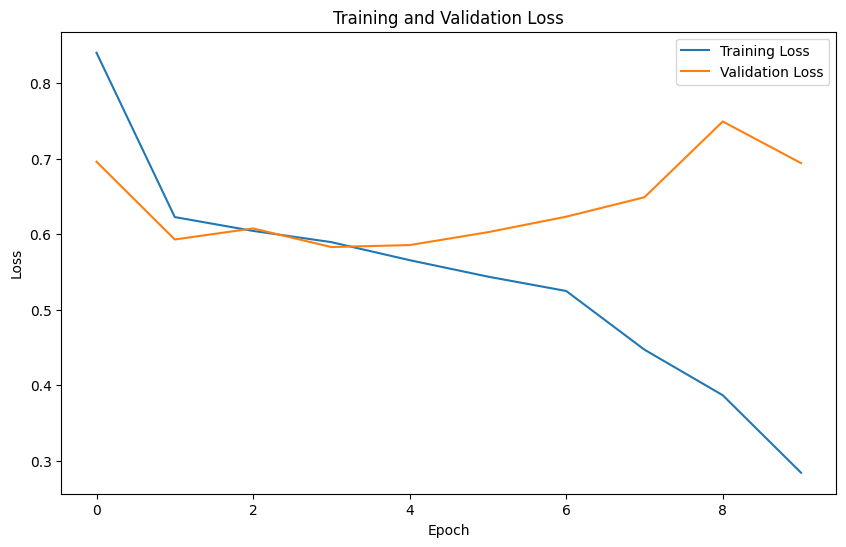

In [ ]:
# Summarize results
print("Model training and evaluation completed.")
print("Validation Accuracy:", accuracy)

# Visualize loss and accuracy trends
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


